In [1]:
print(open("Assignment.txt").read())

For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining




In [2]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from textblob import TextBlob

In [6]:
df = pd.read_csv('Elon_musk.csv',encoding='cp1252')
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [8]:
data = df.drop(['Unnamed: 0'], axis= 1)
data

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Cleaning the tweets by creating the function

In [9]:
import string
def cleanTxt(text):
    text = re.sub('@[A-za-z0-9_]*','', text)  # remove @mentions
    text = re.sub('#','',text)                # remove '#' symbol
    text = re.sub('https?:\/\/\S+', '', text) # remove hyper link
    text = re.sub('<[A-Z0-9a-z+-_]*>','', text)
    text = re.sub('[^A-Za-z0-9]',' ', text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

In [10]:
data['Text'] = data['Text'].apply(cleanTxt)
data

,Text
0,I m an alien
1,Ray tracing on Cyberpunk with HDR is next lev...
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,True it sounds so surreal but the negative ...
1995,Make sure to read ur terms amp conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is


### Converting all the tweets into lowercase

In [11]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                                         i m an alien
1    ray tracing on cyberpunk with hdr is next leve...
2                                      great interview
3                               doge is underestimated
4    congratulations tesla china for amazing execut...
Name: Text, dtype: object

### Counting the words in each tweets

In [12]:
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,i m an alien,4
1,ray tracing on cyberpunk with hdr is next leve...,13
2,great interview,2
3,doge is underestimated,3
4,congratulations tesla china for amazing execut...,16


#### Word frequency


In [13]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq

the     487
to      400
a       357
is      356
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
with    108
dtype: int64

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data

,Text,word_count
0,alien,4
1,ray tracing cyberpunk hdr next level tried,13
2,great interview,2
3,doge underestimated,3
4,congratulations tesla china amazing execution ...,16
...,...,...
1994,true sounds surreal negative propaganda still ...,21
1995,make sure read ur terms amp conditions clickin...,11
1996,samwise gamgee,2
1997,altho dumb dumber,5


#### word frequency after removal of stopwords

In [15]:
freq_Sw = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

amp         219
rt          127
tesla        97
yes          86
great        76
haha         55
good         51
launch       49
sure         43
would        41
yeah         41
much         40
dragon       39
first        39
like         39
one          39
spacex       37
true         35
probably     35
high         34
dtype: int64

#### Common word removal

In [16]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

amp       219
rt        127
tesla      97
yes        86
great      76
haha       55
good       51
launch     49
sure       43
would      41
dtype: int64

In [17]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulations china amazing execution last y...
Name: Text, dtype: object

#### Rare Words Removal

In [18]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

fever       1
elon        1
cam         1
musk        1
negati      1
carousel    1
typical     1
unusual     1
bogus       1
altho       1
dtype: int64

In [19]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulations china amazing execution last y...
Name: Text, dtype: object

#### Spelling correction

In [20]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                                alien
1           ray tracing cyberpunk her next level tried
2                                            interview
3                                  done underestimated
4    congratulations china amazing execution last y...
Name: Text, dtype: object

#### Tokenization

In [21]:
TextBlob(data['Text'][1]).words

WordList(['ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'tried'])

#### Stemming

In [22]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                              alien
1             ray trace cyberpunk hdr next level tri
2                                          interview
3                                    doge underestim
4    congratul china amaz execut last year next even
Name: Text, dtype: object

#### Lemmatization

In [23]:
from textblob import Word

In [24]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulation china amazing execution last ye...
Name: Text, dtype: object

In [25]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(data["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

### N - grams

In [26]:
TextBlob(data['Text'][0]).ngrams(2)

[]

In [27]:
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,ray,1
1,tracing,1
2,cyberpunk,1
3,hdr,1
4,next,1
5,level,1
6,tried,1


In [28]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,ray,1,6.501790
1,tracing,1,7.600402
2,cyberpunk,1,5.990964
3,hdr,1,7.600402
4,next,1,4.233107
5,level,1,5.297817
6,tried,1,5.808643


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5781 stored elements in Compressed Sparse Row format>

#### Wordcloud

In [30]:
from textblob import Word
from wordcloud import WordCloud

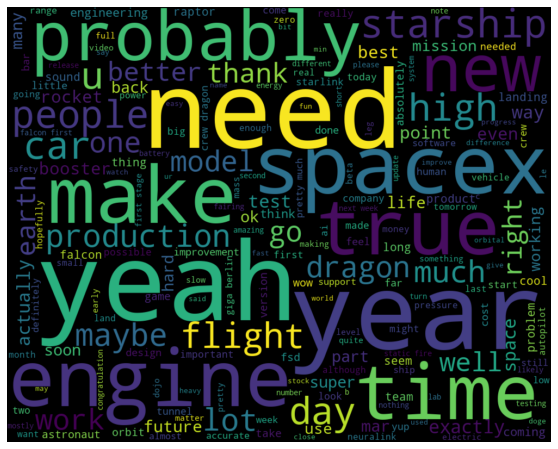

In [31]:
allwords = " ".join( [twts for twts in data["Text"]])
wordCloud = WordCloud(width =1000, height = 800, random_state= 21, max_font_size = 200).generate(allwords)

plt.figure( figsize = (10,8)) 
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6456 stored elements in Compressed Sparse Row format>

#### Sentiment Analysis

In [33]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)


0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [34]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,alien,-0.25
1,ray tracing cyberpunk hdr next level tried,0.00
2,interview,0.00
3,doge underestimated,0.00
4,congratulation china amazing execution last ye...,0.20


# Perform emotion mining


In [35]:
import codecs

In [36]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3A3B-B1C3

 Directory of C:\Users\Dell\EXCELR\Assignment\Text mining

17-12-2022  23:44    <DIR>          .
13-12-2022  19:31    <DIR>          ..
03-12-2022  10:45    <DIR>          .ipynb_checkpoints
17-12-2022  19:31                47 amazon_products.csv
03-12-2022  10:43               211 Assignment.txt
03-12-2022  10:43           170,848 Elon_musk.csv
03-12-2022  10:43            46,299 negative-words.txt
03-12-2022  10:43            20,630 positive-words.txt
03-12-2022  10:43             4,158 stop.txt
17-12-2022  23:44           488,645 Text Mining - ( Amazon Review ).ipynb
17-12-2022  19:33           517,856 Untitled.ipynb
               8 File(s)      1,248,694 bytes
               3 Dir(s)  180,756,246,528 bytes free


In [37]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [38]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [39]:
import nltk
nltk.download('twitter_samples')


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [40]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [41]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [42]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

print(tweet_tokens[0])

#FollowFriday


In [43]:
!pip3 install beautifulsoup4

In [44]:
no_pages = 2

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [45]:
import requests
from bs4 import BeautifulSoup


In [46]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating','Customers_Rated', 'Price'])
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')
df = pd.read_csv("amazon_products.csv")

In [47]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3A3B-B1C3

 Directory of C:\Users\Dell\EXCELR\Assignment\Text mining

17-12-2022  23:44    <DIR>          .
13-12-2022  19:31    <DIR>          ..
03-12-2022  10:45    <DIR>          .ipynb_checkpoints
17-12-2022  23:45                47 amazon_products.csv
03-12-2022  10:43               211 Assignment.txt
03-12-2022  10:43           170,848 Elon_musk.csv
03-12-2022  10:43            46,299 negative-words.txt
03-12-2022  10:43            20,630 positive-words.txt
03-12-2022  10:43             4,158 stop.txt
17-12-2022  23:44           488,645 Text Mining - ( Amazon Review ).ipynb
17-12-2022  19:33           517,856 Untitled.ipynb
               8 File(s)      1,248,694 bytes
               3 Dir(s)  180,749,365,248 bytes free


In [48]:
df = pd.read_csv("amazon_products.csv")

In [49]:
df.head()

,Book Name,Author,Rating,Customers_Rated,Price


In [50]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,alien,-0.25
1,ray tracing cyberpunk hdr next level tried,0.00
2,interview,0.00
3,doge underestimated,0.00
4,congratulation china amazing execution last ye...,0.20


In [51]:
word_freq_df.head(100)

,term,occurrences,frequency
0,aber,1,0.000206
1,abo,1,0.000206
2,aboard,1,0.000206
3,abort,3,0.000617
4,absence,1,0.000206
...,...,...,...
95,altit,1,0.000206
96,altitude,2,0.000411
97,alto,1,0.000206
98,aluminum,1,0.000206


In [52]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


data['Subjectivity'] = data['Text'].apply(getSubjectivity)
data['Polarity'] = data['Text'].apply(getPolarity)

In [53]:
data.iloc[:,2:]

,sentiment,Subjectivity,Polarity
0,-0.250000,0.750000,-0.250000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.200000,0.322222,0.200000
...,...,...,...
1994,0.152381,0.492857,0.152381
1995,0.000000,0.000000,0.000000
1996,0.000000,0.000000,0.000000
1997,-0.375000,0.500000,-0.375000


In [54]:
from wordcloud import WordCloud

In [55]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3A3B-B1C3

 Directory of C:\Users\Dell\EXCELR\Assignment\Text mining

17-12-2022  23:44    <DIR>          .
13-12-2022  19:31    <DIR>          ..
03-12-2022  10:45    <DIR>          .ipynb_checkpoints
17-12-2022  23:45                47 amazon_products.csv
03-12-2022  10:43               211 Assignment.txt
03-12-2022  10:43           170,848 Elon_musk.csv
03-12-2022  10:43            46,299 negative-words.txt
03-12-2022  10:43            20,630 positive-words.txt
03-12-2022  10:43             4,158 stop.txt
17-12-2022  23:44           488,645 Text Mining - ( Amazon Review ).ipynb
17-12-2022  19:33           517,856 Untitled.ipynb
               8 File(s)      1,248,694 bytes
               3 Dir(s)  180,749,365,248 bytes free


In [56]:
file= open('positive-words.txt',mode='r', encoding='cp1252')
print(file.read())

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [57]:
file= open('negative-words.txt',mode='r', encoding='cp1252')
print(file.read())

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [58]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulation china amazing execution last ye...
Name: Text, dtype: object

In [59]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

year      50
yeah      41
make      41
dragon    41
much      40
need      40
one       39
like      39
first     39
time      39
dtype: int64

In [60]:
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

,Text,stopwords
0,alien,0
1,ray tracing cyberpunk hdr next level tried,0
2,interview,0
3,doge underestimated,0
4,congratulation china amazing execution last ye...,0


In [61]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulation china amazing execution last ne...
Name: Text, dtype: object

In [62]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

served        1
superpower    1
luck          1
cape          1
student       1
employer      1
attractive    1
list          1
risin         1
gamgee        1
dtype: int64

In [63]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulation china amazing execution last ne...
Name: Text, dtype: object

In [64]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                                alien
1           ray tracing cyberpunk her next level tried
2                                            interview
3                                  done underestimated
4    congratulation china amazing execution last ne...
Name: Text, dtype: object

In [65]:
TextBlob(data['Text'][1]).words

WordList(['ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'tried'])

In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                         alien
1        ray trace cyberpunk hdr next level tri
2                                     interview
3                               doge underestim
4    congratul china amaz execut last next even
Name: Text, dtype: object

In [68]:

data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()


0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulation china amazing execution last ne...
Name: Text, dtype: object

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [70]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [71]:
sentiments_using_SIA = data.Text.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Text
pos,1780
neg,219


In [72]:
data['sentiment'] = sentiments_using_SIA
data

,Text,word_count,sentiment,Subjectivity,Polarity,stopwords
0,alien,4,pos,0.750000,-0.250000,0
1,ray tracing cyberpunk hdr next level tried,13,pos,0.000000,0.000000,0
2,interview,2,pos,0.000000,0.000000,0
3,doge underestimated,3,neg,0.000000,0.000000,0
4,congratulation china amazing execution last ne...,16,pos,0.322222,0.200000,0
...,...,...,...,...,...,...
1994,true sound surreal negative propaganda still e...,21,pos,0.492857,0.152381,0
1995,read ur term condition clicking accept,11,pos,0.000000,0.000000,0
1996,samwise,2,pos,0.000000,0.000000,0
1997,dumb dumber,5,neg,0.500000,-0.375000,0


In [73]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [74]:
import re

In [75]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
data['tidy_tweets'] = np.vectorize(remove_pattern)(data['Text'], "@[\w]*: | *RT*")
data.head(10)

,Text,word_count,sentiment,Subjectivity,Polarity,stopwords,tidy_tweets
0,alien,4,pos,0.750000,-0.250000,0,alien
1,ray tracing cyberpunk hdr next level tried,13,pos,0.000000,0.000000,0,ray tracing cyberpunk hdr next level tried
2,interview,2,pos,0.000000,0.000000,0,interview
3,doge underestimated,3,neg,0.000000,0.000000,0,doge underestimated
4,congratulation china amazing execution last ne...,16,pos,0.322222,0.200000,0,congratulation china amazing execution last ne...
5,happy new ox,6,pos,0.727273,0.468182,0,happy new ox
6,frodo underdoge thought fail,13,neg,0.300000,-0.500000,0,frodo underdoge thought fail
7,thanks,2,pos,0.200000,0.200000,0,thanks
8,indeed tweet definitely represent real world a...,10,pos,0.400000,0.100000,0,indeed tweet definitely represent real world a...
9,entertaining outcome likely,8,pos,0.850000,0.250000,0,entertaining outcome likely
